# Exponential Smoothing Filter

This filter uses a difference equation:

    y(n) = (1 - α) * y(n-1) + α * x(n)

- `x(n)`: Input signal
- `y(n)`: Filtered output
- `α`: Smoothing factor (0 < α < 1)

#### Purpose:
To smooth high-frequency noise and produce a stable signal by controlling the influence of new input vs. past output.

#### Behavior:
- Low α → stronger smoothing, slower response.
- High α → less smoothing, faster response.

#### Applications:
- Signal and sensor data smoothing
- Control systems
- Financial data analysis

#### Stability:
- Always stable for 0 < α < 1
- Impulse response: decays exponentially


## 📈 Effect of Alpha (α)

| Alpha Value | Behavior             | Description                                              |
|-------------|----------------------|----------------------------------------------------------|
| 0.25        | High smoothing       | Slow response, good noise reduction                      |
| 0.5         | Moderate smoothing   | Balanced noise reduction and responsiveness              |
| 0.8         | Low smoothing        | Fast response to changes, less noise suppression         |

---


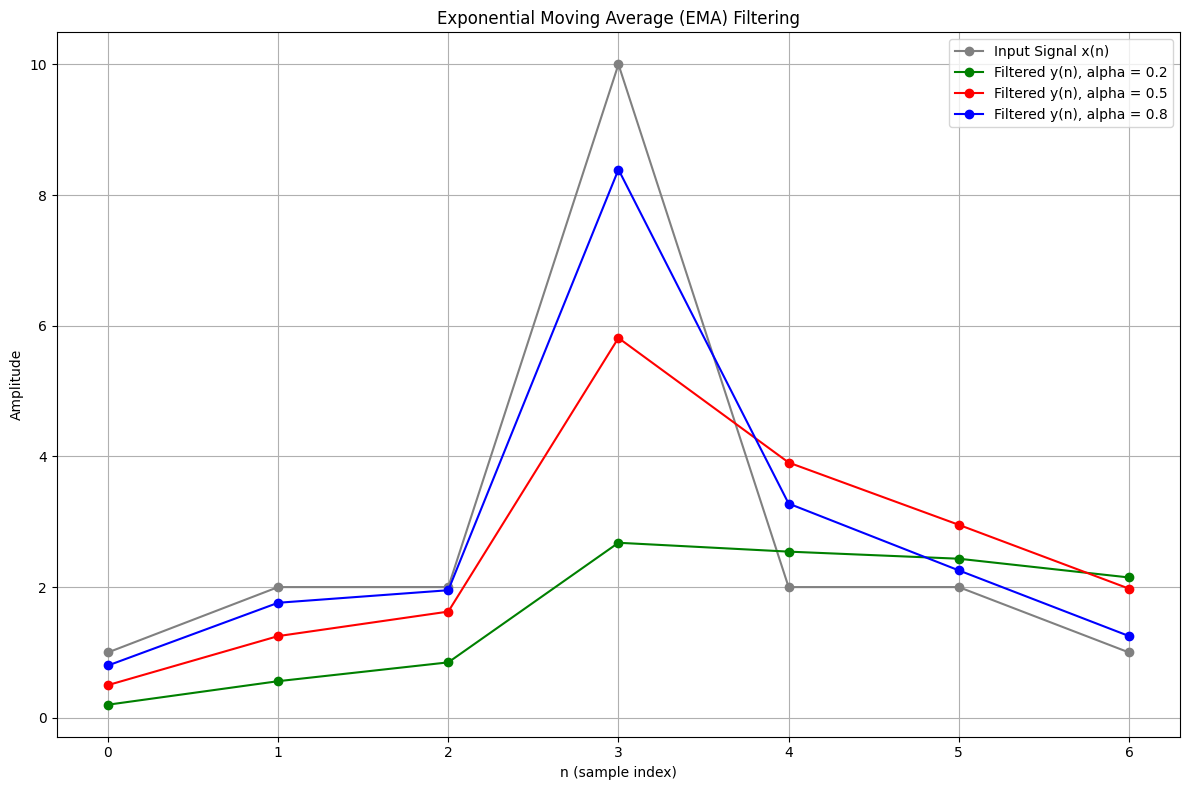

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple input signal (with a spike at index 3)
x = [1, 2, 2, 10, 2, 2, 1]

def compute(x, alpha):
    y = []              # List to store filtered values
    y_previous = 0      # Initialize previous output to zero

    for n in range(len(x)):
        # Apply EMA filter difference equation
        y_current = (1 - alpha) * y_previous + alpha * x[n]
        y.append(y_current)
        y_previous = y_current  # Update previous output for next iteration

    return y

# Compute filtered signals with different smoothing factors
y1 = compute(x, 0.2)   # More smoothing (slower to react to changes)
y2 = compute(x, 0.5)   # Moderate smoothing
y3 = compute(x, 0.8)   # Less smoothing (faster to react)

# Plot the original and filtered signals
plt.figure(figsize=(12, 8))

plt.plot(x, label='Input Signal x(n)', color='gray', marker='o')
plt.plot(y1, label='Filtered y(n), alpha = 0.2', color='green', marker='o')
plt.plot(y2, label='Filtered y(n), alpha = 0.5', color='red', marker='o')
plt.plot(y3, label='Filtered y(n), alpha = 0.8', color='blue', marker='o')

plt.title('Exponential Moving Average (EMA) Filtering')
plt.xlabel('n (sample index)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


The effect of an **Exponential Moving Average (EMA)** filter applied to a noisy sinusoidal signal using the following **difference equation**:
* A **300 Hz sine wave** is generated as the base signal.
* **Gaussian noise** is added to simulate real-world signal distortion.


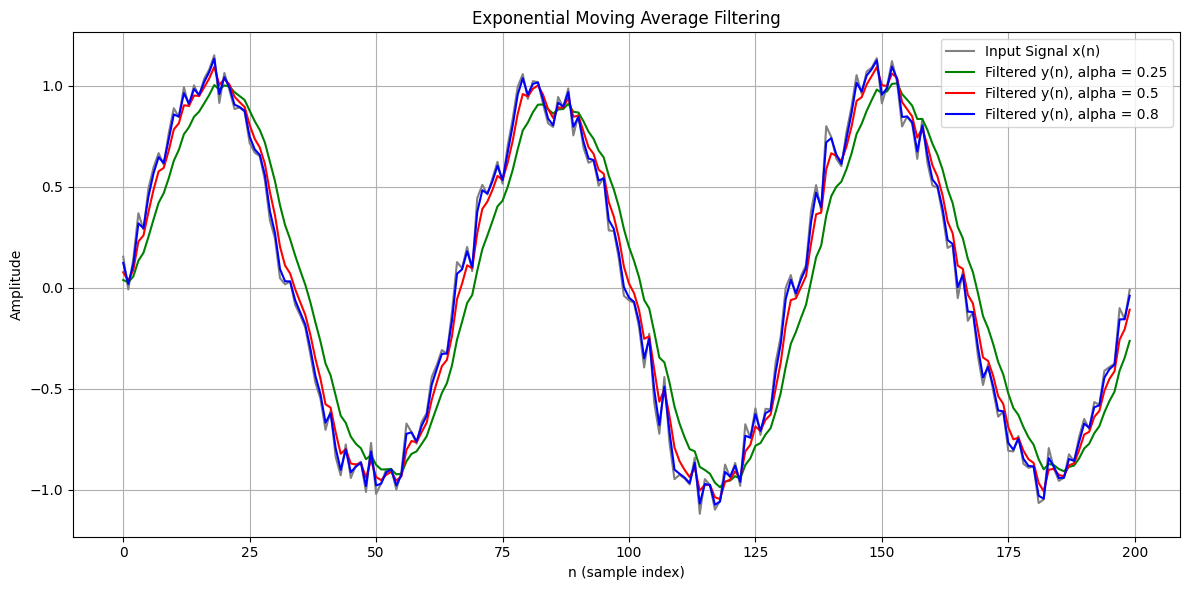

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate time samples from 0 to 2 seconds (200 points)
n = np.linspace(0, 2, 200)

# Generate a pure 300 Hz sine wave
pure_signal = np.sin(2 * np.pi * 300 * n)

# Add Gaussian noise to simulate real-world signal corruption
noise = 0.1 * np.random.randn(len(n))
x = pure_signal + noise  # Noisy input signal

def compute(x, alpha):
    y = []
    y_previous = 0  # Initial condition

    for n in range(len(x)):
        y_current = (1 - alpha) * y_previous + alpha * x[n]
        y.append(y_current)
        y_previous = y_current

    return y

# Apply EMA filtering with different alpha values
y1 = compute(x, 0.25)
y2 = compute(x, 0.5)
y3 = compute(x, 0.8)

# Plot the original and filtered signals
plt.figure(figsize=(12,6))
plt.plot(x, label='Input Signal x(n)', color='gray')
plt.plot(y1, label='Filtered y(n), alpha = 0.25', color='green')
plt.plot(y2, label='Filtered y(n), alpha = 0.5', color='red')
plt.plot(y3, label='Filtered y(n), alpha = 0.8', color='blue')

plt.title('Exponential Moving Average Filtering')
plt.xlabel('n (sample index)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
